Adrian deCola

G Lab

PHYS 231

Due October 22, 2021;  evaluated November 8 (NL)

In [ ]:
from google.colab import drive
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import statistics as stats
import numpy as np
import pandas as pd
import os

In [ ]:
# Mounting the drive
drive.mount('/content/drive')
data_dir = "/content/drive/MyDrive/deCola/G Lab/Data/electronic_data"

Mounted at /content/drive


# Deriving an Expression for the Gravitational Constant, G

In accordance with the experiment set-up, as shown in Figure 1.1, in the equilibrium we know their is no net torque on the system: $$\sum\tau_g = \tau_p$$where $\sum\tau_g$ is the torques from the gravitational force between the pendulum masses and the large masses. These torques point in the same direction and the "cross torques" between farther masses cancel out. It is important to note that even assumptions made in the representation in Figure 1.1 use the small angle approxation theory. We will use this again throughout the derivation for $G$ and will show that the approximation is justified in the next section. Therefore, 
$$2F_g\times l=\kappa\theta_0$$
$$2F_glsin(\frac{\pi}{2}+\theta_0)=\kappa\theta_0$$
Using symmetry, $sin(\frac{\pi}{2}+\theta_0)=sin(\frac{\pi}{2}-\theta_0)$:
\begin{align}
2\frac{GMm}{(H-lsin(\theta_0))^2}lsin(\frac{\pi}{2}-\theta_0)&=\kappa\theta_0\\
2\frac{GMm}{(H-lsin(\theta_0))^2}lcos(\theta_0)&=\kappa\theta_0
\end{align}
Using the small angle approximation: $sin(\theta) = \theta$ and $cos(\theta)=1$.
\begin{align}
2\frac{GMm}{(H-l\theta_0)^2}l&=\kappa\theta_0\\
G&=\frac{\kappa\theta_0(H-l\theta_0)^2}{2Mml}
\end{align}
where $\kappa$ is a constant determined my the torsions pendulum's restoring strength, $\theta_0$ is the angle at with the pendulum reaches equilibrium, $H$ is the distance between the center of mass of the mass on the pendulum and its corresponding large mass, $l$ is the distance from the center of the pendulum to one of its masses, $M$ is the mass of one of the large masses, and $m$ is the mass of one of the masses on the pendulum. 

We cannot measure the mass of the masses on the pendulum so we wish to eliminate this value with its hidden appearence in the pendulum constant, $\kappa$. Remember we reach an equilibrium because energy is disipated. The pendulum also experiences some form of simple harmonic form. For this torsion pendulum, its equation of motion is $$I\ddot{\theta} + C\dot{\theta} + \kappa \theta=0$$
Its solution is of the form $$\theta= Ae^{-\alpha t}\cos{\omega t}$$
Taking the first and second order time derivtive of this solution we get 
\begin{align}
\dot{\theta} &= -A\alpha e^{-\alpha t} \cos{\omega t} - \omega A e^{-\alpha t} \sin{\omega t}\\
\ddot{\theta}&=A\alpha^2 e^{-\alpha t} \cos{\omega t} + 2A\alpha \omega e^{-\alpha t} \sin{\omega t} - \omega^2 A e^{-\alpha t} \cos{\omega t}
\end{align}
Substituting these into the equation of motion:
\begin{align}
I(A\alpha^2 e^{-\alpha t} \cos{\omega t} + 2A\alpha \omega e^{-\alpha t} \sin{\omega t} - \omega^2 A e^{-\alpha t} \cos{\omega t}) + C(-A\alpha e^{-\alpha t} \cos{\omega t} - \omega A e^{-\alpha t} \sin{\omega t}) + \kappa (Ae^{-\alpha t}\cos{\omega t})&=0\\
I\alpha^2\cos{\omega t} + 2\alpha \omega I \sin{\omega t}-I \omega ^ 2\cos{\omega t}+ c\alpha \cos{\omega t} - c\omega \sin{\omega t}+ \kappa \cos{\omega t}&=0\\
\cos{\omega t}(\underbrace{I\alpha^2-I\omega^2-c\alpha + \kappa}_{=0}) + \sin{\omega t}(\underbrace{2\alpha\omega I -c\omega}_{=0}) &= 0 \\
\end{align}
Using the left hand side equation we get:
\begin{align}
I\alpha^2-I\omega^2-c\alpha + \kappa&=0\\
\kappa &= I\omega^2 - I\alpha^2 + c\alpha
\end{align}
Using the right hand side equation:
\begin{align}
2\alpha\omega I -c\omega &= 0\\
c &= 2I\alpha
\end{align}
Subsitituting this into our left hand side equation:
\begin{align}
\kappa &= I\omega^2 - I\alpha^2 + 2I\alpha\alpha\\
\kappa &= I\omega^2 + I\alpha^2
\end{align}
Substituting this into the equation for $G$, the gravitational constant:
\begin{align}
G&=\frac{I(\omega^2 + \alpha^2)\theta_0(H-l\theta_0)^2}{2Mml}
\end{align}
We can treat the masses on the torsion pendulum as two point masses giving a moment of inertia of $$I=2ml^2$$
Substituting this into the equation for $G$, the gravitational constant:
\begin{align}
G&=\frac{2ml^2(\omega^2 + \alpha^2)\theta_0(H-l\theta_0)^2}{2Mml}\\
G&=\frac{l(\omega^2 + \alpha^2)(H-l\theta_0)^2\theta_0}{M}
\end{align}
where $\omega$ clearly the angular frequency of the pendulums motion and $\alpha$ is its characteristic dampening frequency. This is the equation we will use for calculating $G$, the gravitational constant. 


## Deriving Error in G using Error Propogation
We can caluclate an uncertainty in G using error propogation:
\begin{align}
\sigma_G&=\sqrt{\sum_i\left(\frac{\partial G}{\partial p_i}\right)^2\sigma_{p_i}^2}\\
&= \sqrt{ \left( \frac{l(\omega^2 + \alpha^2)}{M}\left( (H-l\theta_0)^2+\theta_0(2(H-l\theta)(-l))\right)\sigma_{\theta_0}\right)^2 + \left( \frac{l\theta_0(\omega^2 + \alpha^2)}{M}(2(H-l\theta_0))\sigma_H\right)^2 + \left( \frac{-l\theta_0(\omega^2 + \alpha^2)(H-l\theta_0)^2}{M^2}\sigma_M\right)^2 + \left( \frac{-l\theta_0=(H-l\theta_0)^2}{M}(2\omega)\sigma_\omega\right)^2 + \left(\frac{-l\theta_0=(H-l\theta_0)^2}{M}(2\alpha)\sigma_\alpha \right)^2 }
\end{align}

## Deriving $l$, $H$, $M$, and $\theta_0$
    Note: All calculations are done below in Python.

All uncertainty calculations will be done with the following equation:
$$\sigma_V=\sqrt{\sum_i\left(\frac{\partial V}{\partial p_i}\right)^2\sigma_{p_i}^2}$$where $V$ is the value for which we want to calculate the uncertainty and and $p_i$ are its components. 

The length of the bar was given as 10 centimeters. It is clear that this length is $2l$. Therefore $l$ is 5 centimeters and there is no uncertainty in this given value. 

$H$ is the distance between the center of mass of the mass on the pendulum and its corresponding large mass. Since the device had a guard and the large mass rested on the guard, $$H=\frac{1}{2}w_gD_M$$where $w_g$ is the width of the guard and $D_m$ is the diameter of the large mass. We get the following uncertainty in this value:
$$\sigma_H=\sqrt{w_g^2\sigma_{d_M}^2+D_M^2\sigma_{w_g}^2}$$
We get the following $H = 4.9\pm0.1cm$.

$M$ is the mass of one of the large masses. This value was measured as $M=1508.2\pm0.2g$.

It is clear from the set up of our experiment shown in Figure 1.1 that $\theta_0=\frac{1}{2} tan^{-1}(\frac{\frac{1}{2}L_t}{L_r})$ where $L_t$ was the distance between the equilibrium points measured to be $8.2 \pm0.9cm$ and $L_r$ is the length from the pendulum to the laser tracker (where we took the measurements of the equilibrium displacements with clear averaged value of $218.5\pm.5cm$. The factor of $\frac{1}{2}$ comes from the fact that our the optical angle(the angle at which the laser is rotated) is twice the mechanical angle (the angle for which the pendulum has rotated. We get the following uncertainty in this value:
$$\sigma_{\theta_0}=\frac{1}{2}\sqrt{\left(\frac{1}{1 + \left( \frac{\frac{1}{2}L_t}{L_r}\right)^2}\frac{1}{2}\sigma_{L_t}\right)^2 + \left( \frac{1}{1 + \left( \frac{\frac{1}{2}L_t}{L_r}\right)^2}\frac{-L_t}{2L_r^2}\sigma_{L_r}\right)^2}$$
We get the following value $\theta_0 = 0.009\pm0.002rad$.
As we can see, it is valid to apply small angle approzimations.


In [ ]:
l = 0.05 # in meters

H_best = (0.067 + 0.03)/2 # in meters
H_unc = 0.5 * np.sqrt(0.082**2*0.001**1 + 0.03**2*0.001**2)
print(f"The best value for H is {round(H_best,3)}.")
print(f"The uncertainty in this value is {round(H_unc, 3)}.")

M_best = 1.5082
M_unc = 0.0002

theta_best = np.arctan(0.5*.082/2.185)/2
theta_unc = .5*np.sqrt((.5*.009/(1 + (.5*.082/2.185)**2))**2 + (-.5*.082*.005/2.185**2/(1 + (.5*.082/2.185)**2))**2)
print(f"The best value for theta is {round(theta_best,3)}.")
print(f"The uncertainty in this value is {round(theta_unc, 3)}.")

The best value for H is 0.049.
The uncertainty in this value is 0.001.
The best value for theta is 0.009.
The uncertainty in this value is 0.002.


## Deriving $\omega$ and $\alpha$
To estimate $\omega$ and $\alpha$ we use the pendulums equation of motion and the regress motion we actually measured, though this was actually measured in voltages. To convert the voltages to position, which is important for estimating the characteristic decay frequency, $\alpha$, we will look at the average equilibrium positions and voltages. From the data is shows that the equilibrium position of $+4.1cm$ corresponded to a voltage of $+1.6V$ and the equilibrium position of $-4.1cm$ corresponded to a voltage of $-1.8V$. Assuming these change linearly, we get $$V=-0.1+\frac{1.7}{4.1}P$$where $V$ is the voltage and $P$ is the position. Solving this for the position we get: $$P=(V-0.1)\frac{4.1}{1.7}*0.01$$
With the $0.01$ scalar to convert to meters. 
We also know that $\theta_0=tan^{-1}(\frac{P}{L_r})=tan^{-1}(\frac{P}{2.185})$. Using the small angle approximation we get $$\theta_0=\frac{P}{2.185}$$

We can now preform a regression to estimate $\omega$ and $\alpha$. However, the regression software has a really hard time trying to measure an angular frequency that is so small. For that reason we instead covert the angular frequency to a period in the equation of motion and convert the estimated value back to an angular frequency. The equation of motion used in the regression is therefore:
$$\theta_0=Ae^{-\alpha t} cos(\frac{2\pi t}{T} + \phi) + c$$
$c$ allows for the voltage to have a non-zero value when the position or angle is zero which we already stated makes sense. The initial angle, $\phi$, allows for any time delays from when we switched the orientation of the masses and when we started collecting data. While this might make the uncertainties in our calculated values larger it makes sense as this time delay does create more uncertainty. 

In [ ]:
# defining the function where t is the indepencent variable and the rest are of the parameters will be estimated
def func(t, A, alpha, T, c, phi):
  return A * np.exp(-alpha*t) * np.cos(2*np.pi*t/T  + phi) + c

Our estimates for the period:
	Period: 650.5403816138619
	Uncertainty: 0.2544089562977442
	Period: 662.9981460890486
	Uncertainty: 0.3936490978283023
	Period: 1310.4140806321113
	Uncertainty: 408.22493694294707
	Period: 943.6258464936604
	Uncertainty: 104.0917126797083
	Period: 662.9592575487889
	Uncertainty: 0.2049747880550875
	Period: 657.7050578916428
	Uncertainty: 0.018769125264218443
	Period: 656.7989314209524
	Uncertainty: 0.0076966580580319155
	Period: 660.696213915536
	Uncertainty: 0.047038688866345824
	Period: 658.7529754377366
	Uncertainty: 1.5579843533831044
	Period: 659.954184487064
	Uncertainty: 0.0681796858337847
Our estimates for the characteristic decay frequency:
	Period: 0.0009336251013322394
	Uncertainty: 4.624567824078015e-11
	Period: 0.0008622178373197157
	Uncertainty: 6.905977856941303e-11
	Period: 0.0026178778510298445
	Uncertainty: 1.4706079215888874e-08
	Period: 0.002717937573400613
	Uncertainty: 8.903090050171202e-09
	Period: 0.0009046091462972487
	Uncertainty

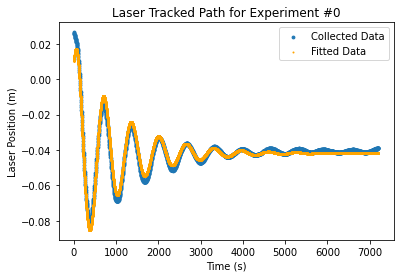

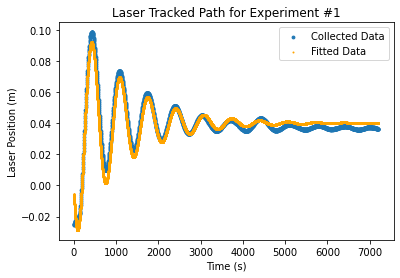

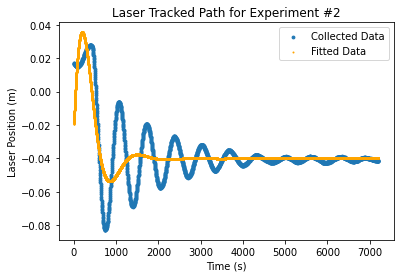

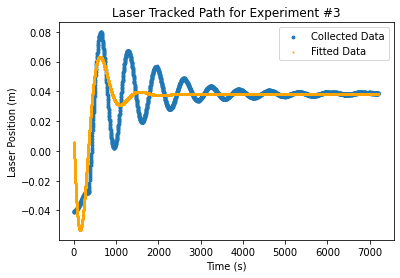

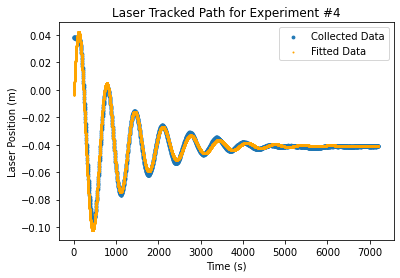

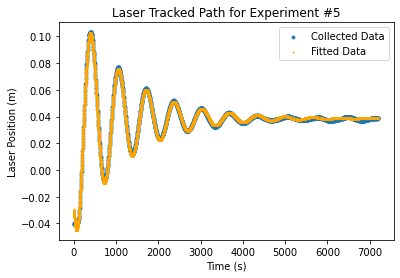

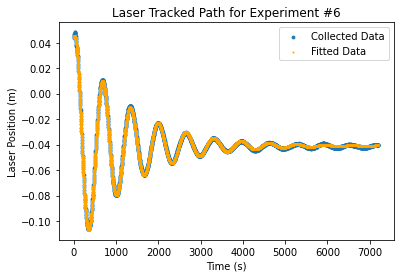

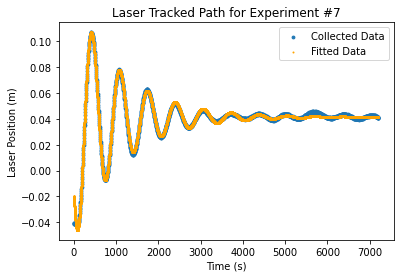

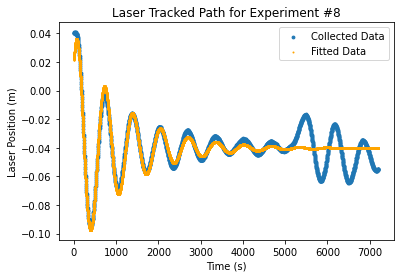

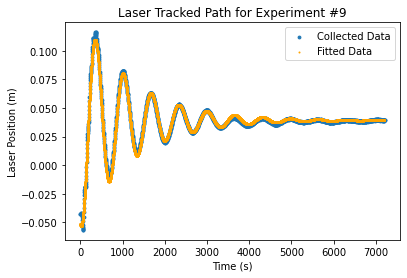

In [ ]:
periods = []
periods_unc = []
frequencies = []
frequencies_unc = []
A_guess = []
c_guess = []
phi_guess = []
print("Our estimates for the period:")
for file in os.listdir(data_dir):
  try:
    df = pd.read_csv(os.path.join(data_dir, file))
    times= df.iloc[:,0].values
    voltage = df.iloc[:,1].values
    position = ((voltage + .1)*4.1/1.7) * 0.01 # convert to meters
    angle = position / 2.185 
    # defining initial guesses which came from intuition of looking at a graph
    guesses_for_optimization = [angle[0]-angle[-1], 0, 700, angle[-1], 0]
    print(f"\tPeriod: {curve_fit(func, times, angle, guesses_for_optimization)[0][2]}\n\tUncertainty: {curve_fit(func, times, position, guesses_for_optimization)[1][2][2]}")
    periods.append(curve_fit(func, times, angle, guesses_for_optimization)[0][2])
    periods_unc.append(curve_fit(func, times, angle, guesses_for_optimization)[1][2][2])
  except:
    pass

print("Our estimates for the characteristic decay frequency:")
for file in os.listdir(data_dir):
  df = pd.read_csv(os.path.join(data_dir, file))
  times= df.iloc[:,0].values
  voltage = df.iloc[:,1].values
  position = ((voltage + .1)*4.1/1.7) * 0.01 # convert to meters
  angle = position / 2.185
  # defining initial guesses which came from intuition of looking at a graph
  guesses_for_optimization = [angle[0]-angle[-1], 0, 700, angle[-1], 0]
  print(f"\tPeriod: {curve_fit(func, times, angle, guesses_for_optimization)[0][1]}\n\tUncertainty: {curve_fit(func, times, position, guesses_for_optimization)[1][1][1]}")
  frequencies.append(curve_fit(func, times, angle, guesses_for_optimization)[0][1])
  frequencies_unc.append(curve_fit(func, times, angle, guesses_for_optimization)[1][1][1])

  # grabing the rest of the estimated parameters for graphing
  A_guess.append(curve_fit(func, times, angle, guesses_for_optimization)[0][0])
  c_guess.append(curve_fit(func, times, angle, guesses_for_optimization)[0][3])
  phi_guess.append(curve_fit(func, times, angle, guesses_for_optimization)[0][4])

print("Graphing the fitted data:")
i = 0
for file in os.listdir(data_dir):
  df = pd.read_csv(os.path.join(data_dir, file))
  times= df.iloc[:,0].values
  voltage = df.iloc[:,1].values
  position = ((voltage + .1)*4.1/1.7) * 0.01 # convert to meters
  angle = position / 2.185
  plt.scatter(times, position, s = 8, label = "Collected Data")
  # adding fit
  x = np.linspace(0,7200,36000)
  y = 2.185 * (A_guess[i] * np.exp(-frequencies[i]*x) * np.cos(2*np.pi*x/periods[i] + phi_guess[i]) + c_guess[i])
  plt.scatter(x,y,s=1, color = "orange", label = "Fitted Data")
  plt.legend()
  plt.title(f"Laser Tracked Path for Experiment #{i}")
  plt.xlabel("Time (s)")
  plt.ylabel("Laser Position (m)")

  plt.show()
  i += 1


It is clear that for the second and third datasets, from their errors and outlier values, the software is having an extremely hard time fitting the data in the way we want it to. We will of course not use these values as the data is fitted so poorly.  

In [ ]:
# making sure we dont pop more if we accidentally run this block of code multiple times
if len(periods)>8:
  periods.pop(2)
  periods_unc.pop(2)
  frequencies.pop(2)
  frequencies_unc.pop(2)
  periods.pop(2)
  periods_unc.pop(2)
  frequencies.pop(2)
  frequencies_unc.pop(2)
  

# converting to numpy array
periods = np.asarray(periods)
periods_unc = np.asarray(periods_unc)
alpha = np.asarray(frequencies)
alpha_unc = np.asarray(frequencies_unc)


To convert the periods to a angular frequencies we will use the following equation: $$\omega = \frac{2\pi}{T}$$
Using our error propogation equation we get and uncertainty in these values of:
$$\sigma_\omega = \frac{-2\pi}{T^2}\sigma_T$$

In [ ]:
omega = 2*np.pi/ periods
omega_unc = -2*np.pi / periods**2 * periods_unc

## Calculating G Values and Uncertainties and Graphing

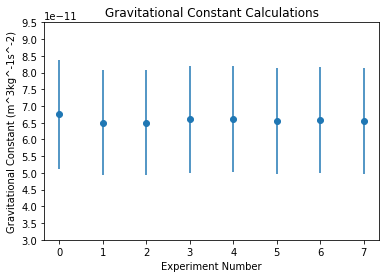

In [ ]:
G = l * theta_best * (omega**2 + alpha**2) * (H_best - l*theta_best)**2 /M_best 
G_unc = np.sqrt(
                 ( l*(omega**2 + alpha**2)/M_best*((H_best - l*theta_best)**2 + theta_best*2*(H_best-l*theta_best)*(-l)) * theta_unc )**2      + 
                 ( l*theta_best*(omega**2 + alpha**2)/M_best*( 2*(H_best - l*theta_best) * H_unc) )**2                                         +
                 ( -1*l * theta_best * (omega**2 + alpha**2) * (H_best - l*theta_best)**2 /M_best**2 * M_unc )**2                              + 
                 ( l * theta_best * (H_best - l*theta_best)**2 /M_best *2*omega * omega_unc )**2                                               + 
                 ( l * theta_best * (H_best - l*theta_best)**2 /M_best *2*alpha * alpha_unc )**2                                              
               )

# graphing 
trail = np.asarray([i for i in range(len(G))])

plt.scatter(trail, G)
plt.errorbar(trail, G, yerr=G_unc, linestyle = '')

plt.title("Gravitational Constant Calculations")
plt.xlabel("Experiment Number")
plt.ylabel("Gravitational Constant (m^3kg^-1s^-2)")
plt.yticks(np.arange(3e-11, 9.51e-11, .5e-11))
plt.show()

## Calculating a Weighted Average Value for G
To get a best value and uncertainty for the gravitational constant we will use the typical method of weighting each value by their uncertainty as shown in the equation below:
 $$G = \frac{\sum_i\frac{G}{\sigma_{G}^2}}{\sum_i\frac{1}{\sigma_{G}^2}}$$
 With an uncertainty according to the following equation:
 $$\sigma_{G} = \left( \sqrt{\sum_i\frac{1}{\sigma_{G}^2}}\right)^{-1}$$
 

In [ ]:
G_weight = (np.sum(G/G_unc**2))/(np.sum(1/G_unc**2))
G_weight_unc = (np.sum(1/G_unc**2))**-.5

print(f"The gravitational constant is {round(G_weight, 12)}m^2kg^-1s^-2.")
print(f"The uncertainty in this value is {round(G_weight_unc,12)}m^2kg^-1s^-2.")

The gravitational constant is 6.6e-11m^2kg^-1s^-2.
The uncertainty in this value is 6e-12m^2kg^-1s^-2.


The weighted average value of the gravitational constant is $$G= (6.6\pm0.6)*10^{-11}\frac{m^2}{kgs^2}$$


## Calculating a Value for $G$ using the Spread Method

In [ ]:
G_spread = stats.mean(G)
G_spread_unc = stats.stdev(G) / np.sqrt(len(G)) * 1.09 #t stat correction

print(f"The gravitational constant calculated value using the spread method is {round(G_spread, 13)}m^2kg^-1s^-2 with an uncertainty in this value of {round(G_spread_unc, 13)}m^2kg^-1s^-2.")

The gravitational constant calculated value using the spread method is 6.58e-11m^2kg^-1s^-2 with an uncertainty in this value of 3e-13m^2kg^-1s^-2.


The spread calculated value of the gravitational constant is $$G= (6.58\pm0.03)*10^{-11}\frac{m^2}{kgs^2}$$

## Comparing Sources of Error
It was suprising to see such large error bars relative to the spread. Reasons to this are discussed in the Conclusion section. To give a framework for this discussion we calculate the average proportion of error from $H$, $M$, $\theta_0$, $\omega$, and $\alpha$. That is the proportions for any value is $$p_V=\overline{\left(\frac{\sigma_V}{\sigma_G}\right)^2}$$We will round to the ten-thousandth decimal.

In [ ]:
print(f"The average proportion of error coming from theta was {round(stats.mean(((l*(omega**2 + alpha**2)/M_best*((H_best - l*theta_best)**2 + theta_best*2*(H_best-l*theta_best)*(-l)) * theta_unc)/G_unc)**2),4)}")
print(f"The average proportion of error coming from H was {round(stats.mean((( l*theta_best*(omega**2 + alpha**2)/M_best*( 2*(H_best - l*theta_best) * H_unc) )/G_unc)**2),4)}")
print(f"The average proportion of error coming from M was {round(stats.mean((( l * theta_best * (omega**2 + alpha**2) * (H_best - l*theta_best)**2 /M_best**2 * M_unc)/G_unc)**2),4)}")
print(f"The average proportion of error coming from omega was {round(stats.mean((( l * theta_best * (H_best - l*theta_best)**2 /M_best *2*omega * omega_unc)/G_unc)**2),4)}")
print(f"The average proportion of error coming from alpha was {round(stats.mean((( l * theta_best * (H_best - l*theta_best)**2 /M_best *2*alpha * alpha_unc)/G_unc)**2),4)}")


The average proportion of error coming from theta was 0.9498
The average proportion of error coming from H was 0.0501
The average proportion of error coming from M was 0.0
The average proportion of error coming from omega was 0.0001
The average proportion of error coming from alpha was 0.0
